# World Cup 2026 DataViz ETL 

This notebook is part of the **World Cup 2026 DataViz** project.


In [121]:
import requests
import pandas as pd
import os
import json

## Retrieve all coutries

In [122]:
url = "https://restcountries.com/v3.1/all"
response = requests.get(url)
data = response.json()
if isinstance(data, list) and len(data) > 0:
    print(data[0].keys())
else:
    print("Error.")




dict_keys(['name', 'tld', 'cca2', 'ccn3', 'cca3', 'independent', 'status', 'unMember', 'currencies', 'idd', 'capital', 'altSpellings', 'region', 'languages', 'translations', 'latlng', 'landlocked', 'area', 'demonyms', 'flag', 'maps', 'population', 'car', 'timezones', 'continents', 'flags', 'coatOfArms', 'startOfWeek', 'capitalInfo'])


In [123]:
def print_json_tree(data, indent=0):
    prefix = "  " * indent
    if isinstance(data, dict):
        for key, value in data.items():
            print(f"{prefix}- {key}")
            print_json_tree(value, indent + 1)
    elif isinstance(data, list):
        print(f"{prefix}- [List of {len(data)} items]")
        if len(data) > 0:
            print_json_tree(data[0], indent + 1)
    else:
        print(f"{prefix}- {type(data).__name__}")

print_json_tree(data)

- [List of 250 items]
  - name
    - common
      - str
    - official
      - str
    - nativeName
      - eng
        - official
          - str
        - common
          - str
  - tld
    - [List of 1 items]
      - str
  - cca2
    - str
  - ccn3
    - str
  - cca3
    - str
  - independent
    - bool
  - status
    - str
  - unMember
    - bool
  - currencies
    - SHP
      - name
        - str
      - symbol
        - str
  - idd
    - root
      - str
    - suffixes
      - [List of 1 items]
        - str
  - capital
    - [List of 1 items]
      - str
  - altSpellings
    - [List of 2 items]
      - str
  - region
    - str
  - languages
    - eng
      - str
  - translations
    - ara
      - official
        - str
      - common
        - str
    - bre
      - official
        - str
      - common
        - str
    - ces
      - official
        - str
      - common
        - str
    - cym
      - official
        - str
      - common
        - str
    - deu
      - officia

In [124]:
countries = []

for country in data:
    try:
        countrie = {
            "countrie_name": country["name"]["common"],
            "short_name": country["cca3"],
            "continent": country["region"],
            "latitude": country["latlng"][0] if "latlng" in country else None,
            "longitude": country["latlng"][1] if "latlng" in country else None,
            "flag_url": country["flags"]["svg"] if "flags" in country and "svg" in country["flags"] else None
        }
        countries.append(countrie)
    except Exception as e:
        print(f"Skipping country due to error: {e}")

print(countries)

[{'countrie_name': 'South Georgia', 'short_name': 'SGS', 'continent': 'Antarctic', 'latitude': -54.5, 'longitude': -37.0, 'flag_url': 'https://flagcdn.com/gs.svg'}, {'countrie_name': 'Grenada', 'short_name': 'GRD', 'continent': 'Americas', 'latitude': 12.11666666, 'longitude': -61.66666666, 'flag_url': 'https://flagcdn.com/gd.svg'}, {'countrie_name': 'Switzerland', 'short_name': 'CHE', 'continent': 'Europe', 'latitude': 47.0, 'longitude': 8.0, 'flag_url': 'https://flagcdn.com/ch.svg'}, {'countrie_name': 'Sierra Leone', 'short_name': 'SLE', 'continent': 'Africa', 'latitude': 8.5, 'longitude': -11.5, 'flag_url': 'https://flagcdn.com/sl.svg'}, {'countrie_name': 'Hungary', 'short_name': 'HUN', 'continent': 'Europe', 'latitude': 47.0, 'longitude': 20.0, 'flag_url': 'https://flagcdn.com/hu.svg'}, {'countrie_name': 'Taiwan', 'short_name': 'TWN', 'continent': 'Asia', 'latitude': 23.5, 'longitude': 121.0, 'flag_url': 'https://flagcdn.com/tw.svg'}, {'countrie_name': 'Wallis and Futuna', 'short_n

In [125]:
df = pd.DataFrame(countries)
print(df.head)




<bound method NDFrame.head of      countrie_name short_name  continent   latitude   longitude  \
0    South Georgia        SGS  Antarctic -54.500000  -37.000000   
1          Grenada        GRD   Americas  12.116667  -61.666667   
2      Switzerland        CHE     Europe  47.000000    8.000000   
3     Sierra Leone        SLE     Africa   8.500000  -11.500000   
4          Hungary        HUN     Europe  47.000000   20.000000   
..             ...        ...        ...        ...         ...   
245        Belgium        BEL     Europe  50.833333    4.000000   
246         Israel        ISR       Asia  31.470000   35.130000   
247    New Zealand        NZL    Oceania -41.000000  174.000000   
248      Nicaragua        NIC   Americas  13.000000  -85.000000   
249       Anguilla        AIA   Americas  18.250000  -63.166667   

                       flag_url  
0    https://flagcdn.com/gs.svg  
1    https://flagcdn.com/gd.svg  
2    https://flagcdn.com/ch.svg  
3    https://flagcdn.com/sl.s

In [126]:
output_path = "../data/ref/countries.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)


df.to_csv(output_path, index=False)
print("countries.csv generated successfully.")

countries.csv generated successfully.


## List of FIFA teams 
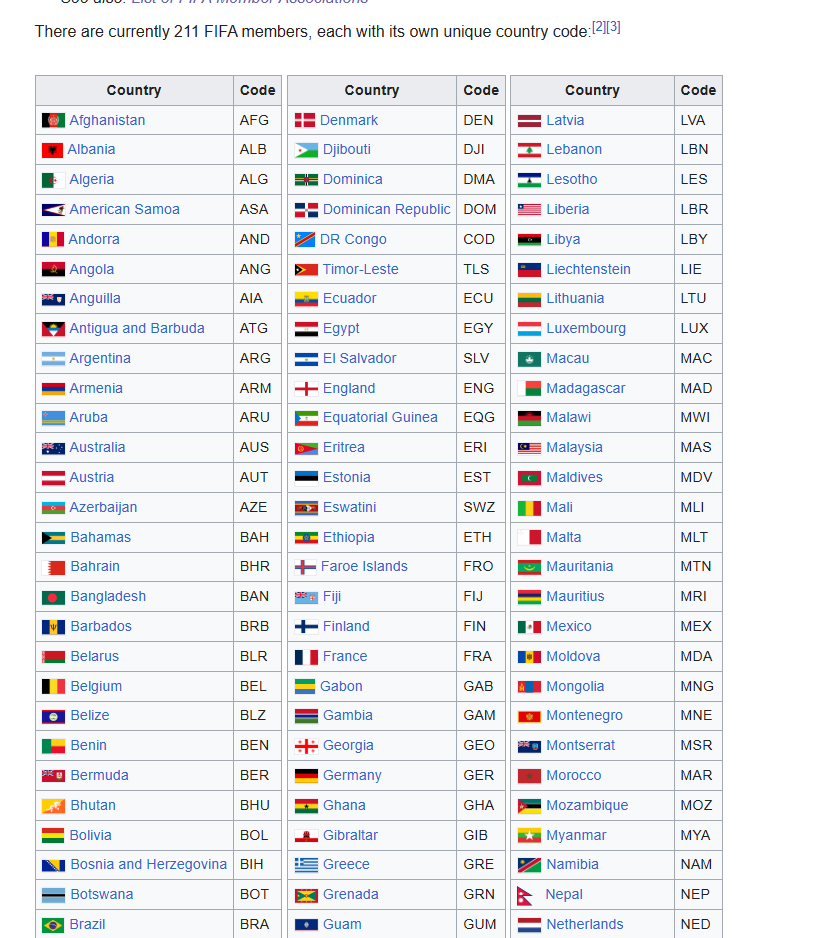

In [127]:
url = "https://en.wikipedia.org/wiki/List_of_FIFA_country_codes"

In [128]:
tables = pd.read_html(url)
print(tables)

[                     Country Code
0                Afghanistan  AFG
1                    Albania  ALB
2                    Algeria  ALG
3             American Samoa  ASA
4                    Andorra  AND
5                     Angola  ANG
6                   Anguilla  AIA
7        Antigua and Barbuda  ATG
8                  Argentina  ARG
9                    Armenia  ARM
10                     Aruba  ARU
11                 Australia  AUS
12                   Austria  AUT
13                Azerbaijan  AZE
14                   Bahamas  BAH
15                   Bahrain  BHR
16                Bangladesh  BAN
17                  Barbados  BRB
18                   Belarus  BLR
19                   Belgium  BEL
20                    Belize  BLZ
21                     Benin  BEN
22                   Bermuda  BER
23                    Bhutan  BHU
24                   Bolivia  BOL
25    Bosnia and Herzegovina  BIH
26                  Botswana  BOT
27                    Brazil  BRA
28    British

In [129]:
fifa_tables = pd.concat(tables[:4], ignore_index=True)
print(fifa_tables.columns)
print(fifa_tables.head())



Index(['Country', 'Code'], dtype='object')
          Country Code
0     Afghanistan  AFG
1         Albania  ALB
2         Algeria  ALG
3  American Samoa  ASA
4         Andorra  AND


In [130]:
fifa_tables.to_csv("../data/ref/fifa_members.csv", index=False)

print("fifa_members.csv created!")


fifa_members.csv created!


## Inner join on coutries and fifa members

In [131]:
countries = pd.read_csv("../data/ref/countries.csv")
fifa = pd.read_csv("../data/ref/fifa_members.csv")

In [132]:
countries['team_name_clean'] = countries['countrie_name'].str.strip().str.lower()
fifa['country_clean'] = fifa['Country'].str.strip().str.lower()

In [133]:
type(countries)


pandas.core.frame.DataFrame

In [134]:
merged = fifa.merge(countries, how='left', left_on='country_clean', right_on='team_name_clean')

merged.shape  

(211, 10)

In [135]:
print(merged.columns.tolist())


['Country', 'Code', 'country_clean', 'countrie_name', 'short_name', 'continent', 'latitude', 'longitude', 'flag_url', 'team_name_clean']


In [136]:

cols_from_countries = merged.columns[3:]  
missing = merged[merged[cols_from_countries].isna().all(axis=1)]
missing[['Country', 'Code']]


,Country,Code
42,Chinese Taipei,TPE
45,Congo,CGO
52,Czech Republic,CZE
62,England,ENG
141,Northern Ireland,NIR
155,Republic of Ireland,IRL
166,Scotland,SCO
186,Tahiti,TAH
202,U.S. Virgin Islands,VIR
206,Vietnam ((kontol)),VIE


In [140]:

countries_base = pd.read_csv("../data/ref/countries.csv")
manual = pd.read_csv("../data/ref/manual_countries.csv")


countries_all = pd.concat([countries_base, manual], ignore_index=True)


countries_all["team_name_clean"] = countries_all["countrie_name"].str.strip().str.lower()

In [141]:


fifa['country_clean'] = fifa['Country'].str.strip().str.lower()


manual_matches = {
    'chinese taipei': 'taiwan',
    'congo': 'republic of the congo',
    'czech republic': 'czechia',
    'republic of ireland': 'ireland',
    'u.s. virgin islands': 'united states virgin islands',
    'vietnam ((kontol))': 'vietnam',
}
fifa['country_clean'] = fifa['country_clean'].replace(manual_matches)


merged = fifa.merge(countries_all, how="left", left_on="country_clean", right_on="team_name_clean")



In [142]:
cols_from_countries = merged.columns[3:]  
missing = merged[merged[cols_from_countries].isna().all(axis=1)]
missing[['Country', 'Code']]

,Country,Code


In [147]:
merged.drop(columns=["country_clean", "team_name_clean"], inplace=True)



KeyError: "['country_clean', 'team_name_clean'] not found in axis"

In [148]:
merged.rename(columns={"countrie_name": "official_name"}, inplace=True)

In [149]:
merged.to_csv("../data/ref/fifa_with_countries.csv", index=False)
print("Exported full dataset to fifa_with_countries.csv")

Exported full dataset to fifa_with_countries.csv


,Country,Code
62,England,ENG
141,Northern Ireland,NIR
166,Scotland,SCO
186,Tahiti,TAH
207,Wales,WAL
